# Output Formatters Tutorial

---

### To Get the Most Out of this Tutorial
You may read more about the `output_formatter` plugin type <br/>
on the accompanying slides [hosted at this link](https://docs.google.com/presentation/d/1wFbrP4RBdwf6Hx30adD9DN4jNZm1f0hVaHxV--encS0/edit?usp=sharing).

## Exploring Output Formatters With Scripting

We will walk through three examples of existing output formatters to get a better understanding of the existing options.  
That way you can jump right into using these plugins for common use-cases.

### Importing the GeoIPS Interfaces

Since we are walking through this portion of the tutorial as a Python script, 
we need to import every plugin that we plan to use.

We use the convention:
`{interface_type}.get_plugin({plugin_name})` 
to load the plugins at runtime .

In [1]:
!geoips config create-registries

01_133215    log_setup.py:162  INTERACTIVE: Skipping module 'tc_file_naming' from 'geoips', interface_name is 'None'
01_133215    log_setup.py:162  INTERACTIVE: Skipping module 'boxdefinitions' from 'geoips', interface_name is 'None'
01_133215    log_setup.py:162  INTERACTIVE: Skipping module 'interp_pyresample' from 'geoips', interface_name is 'None'
01_133215    log_setup.py:162  INTERACTIVE: Skipping module 'interp_scipy' from 'geoips', interface_name is 'None'
01_133216    log_setup.py:162  INTERACTIVE: Skipping module 'geostationary_geolocation' from 'geoips', interface_name is 'None'
01_133216    log_setup.py:162  INTERACTIVE: Skipping module 'hrit_reader' from 'geoips', interface_name is 'None'
01_133216    log_setup.py:162  INTERACTIVE: Skipping module 'remss_reader' from 'geoips', interface_name is 'None'
01_133216    log_setup.py:162  INTERACTIVE: Writing /home/user01/miniconda3/lib/python3.11/site-packages/geoips/registered_plugins.json
01_133216    log_setup.py:162  INTERAC

In [2]:
import geoips
from geoips import interfaces

# Since we are reading abi data in a netCDF format, we will use this reader
abi_reader = interfaces.readers.get_plugin("abi_netcdf")

Since we load these plugins dynamically, it can take some extra work to check
their call signatures.  
We can look more closely at the reader plugin by calling:
(this only works in ipython or jupyter notebooks)

In [3]:
abi_reader?

Signature:     
abi_reader(
    fnames,
    metadata_only=False,
    chans=None,
    area_def=None,
    self_register=False,
    geolocation_cache_backend='memmap',
    cache_chunk_size=None,
    cache_data=False,
    cache_solar_angles=False,
    resource_tracker=None,
    roi=None,
)
Type:           ReadersPlugin
String form:    <geoips.interfaces.base.ReadersPlugin object at 0x7f1ba42918d0>
File:           ~/miniconda3/lib/python3.11/site-packages/geoips/interfaces/base.py
Docstring:      Standard GeoIPS xarray dictionary based ABI NetCDF data reader.
Call docstring:
Read ABI NetCDF data from a list of filenames.

Parameters
----------
fnames : list
    * List of strings, full paths to files
metadata_only : bool, default=False
    * Return before actually reading data if True
chans : list of str, default=None
    * List of desired channels (skip unneeded variables as needed).
    * Include all channels if None.
area_def : pyresample.AreaDefinition, default=None
    * Specify region 

Here we can see the call signature and docstring from the plugin.  
This should be enough to help you figure out what arguments to pass.

### Reading the ABI Test Data
  
For this test, we will use the data stored in the `GEOIPS_TESTDATA_DIR` directory.
  
We can access the current GeoIPS environment variables by calling:  
`geoips.filenames.base_paths.PATHS`  
which returns a dictionary with the environment variables.

In [4]:
from glob import glob
from geoips.filenames.base_paths import PATHS as GPATHS
GEOIPS_TESTDATA_DIR = GPATHS['GEOIPS_TESTDATA_DIR']
in_fpath = f"{GEOIPS_TESTDATA_DIR}/test_data_abi/data/goes16_20200918_1950/*"
in_fpaths = glob(in_fpath)

We want to restrict our output to just the CONUS sector

In [5]:
%%bash
find $HOME -path "*/plugins/*" -type d -name ".ipynb_checkpoints" -exec rm -rf {} +
geoips config create-registries

01_133241    log_setup.py:162  INTERACTIVE: Skipping module 'tc_file_naming' from 'geoips', interface_name is 'None'
01_133242    log_setup.py:162  INTERACTIVE: Skipping module 'boxdefinitions' from 'geoips', interface_name is 'None'
01_133242    log_setup.py:162  INTERACTIVE: Skipping module 'interp_pyresample' from 'geoips', interface_name is 'None'
01_133242    log_setup.py:162  INTERACTIVE: Skipping module 'interp_scipy' from 'geoips', interface_name is 'None'
01_133242    log_setup.py:162  INTERACTIVE: Skipping module 'geostationary_geolocation' from 'geoips', interface_name is 'None'
01_133242    log_setup.py:162  INTERACTIVE: Skipping module 'hrit_reader' from 'geoips', interface_name is 'None'
01_133242    log_setup.py:162  INTERACTIVE: Skipping module 'remss_reader' from 'geoips', interface_name is 'None'
01_133242    log_setup.py:162  INTERACTIVE: Writing /home/user01/miniconda3/lib/python3.11/site-packages/geoips/registered_plugins.json
01_133242    log_setup.py:162  INTERAC

In [6]:
conus = interfaces.sectors.get_plugin("conus")

First we need to read the abi data for channel 14 Brightness Temperature

In [7]:
xdict = abi_reader(fnames=in_fpaths, area_def=conus.area_definition, chans=["B14BT"])

# Since we passed an area_def for "conus", that is the name of the Xarray Object we want to call.
conus_xobj = xdict["conus"]

# Let's look at what conus_xobj contains within it:
conus_xobj

<xarray.Dataset> Size: 161MB
Dimensions:                  (dim_0: 1200, dim_1: 2400)
Dimensions without coordinates: dim_0, dim_1
Data variables:
    B14BT                    (dim_0, dim_1) float64 23MB 266.3 266.5 ... 296.7
    latitude                 (dim_0, dim_1) float64 23MB nan nan ... 23.33 23.33
    longitude                (dim_0, dim_1) float64 23MB nan nan ... -65.99
    satellite_zenith_angle   (dim_0, dim_1) float64 23MB nan nan ... 29.26 29.27
    satellite_azimuth_angle  (dim_0, dim_1) float64 23MB nan nan ... 21.78 21.83
    solar_zenith_angle       (dim_0, dim_1) float64 23MB nan nan ... 54.19 54.21
    solar_azimuth_angle      (dim_0, dim_1) float64 23MB nan nan ... 4.439 4.439
Attributes: (12/13)
    file_metadata:                      {'B14': {'file_info': {'id': '0074e8b...
    start_datetime:                     2020-09-18 19:50:20.526449
    end_datetime:                       2020-09-18 19:59:51.325366
    source_name:                        abi
    data_provider:                      noaa
    source_file_names:                  ['OR_ABI-L1b-RadF-M6C14_G16_s20202621...
    ...                                 ...
    longitude_of_projection_origin:     -75.0
    perspective_point_height:           35786023.0
    platform_name:                      goes-16
    area_definition:                    Area ID: conus\nDescription: Continen...
    area_id:                            conus
    interpolation_radius_of_influence:  10000.0

### Applying the Interpolator
We want to use Nearest Neighbor resampling for this dataset, so we will use the interp_nearest interpolator plugin

In [8]:

interp_nearest = interfaces.interpolators.get_plugin("interp_nearest")

interp_nearest?

Signature:     
interp_nearest(
    area_def,
    input_xarray,
    output_xarray,
    varlist,
    array_num=None,
    **kwargs,
)
Type:           InterpolatorsPlugin
String form:    <geoips.interfaces.base.InterpolatorsPlugin object at 0x7f1ba08bacd0>
File:           ~/miniconda3/lib/python3.11/site-packages/geoips/interfaces/base.py
Docstring:      Geoips plugin for driving pyresample Nearest Neighbor interpolation.
Call docstring: Pyresample interp_kd_tree nearest neighbor GeoIPS plugin.

In [9]:
# Now let us apply the Nearest Neighbor interpolation to our data
output_dataset = interp_nearest(conus.area_definition,
                                conus_xobj,
                                None,
                                ["B14BT", "longitude", "latitude"])

# Let's look at our output_dataset
output_dataset

<xarray.Dataset> Size: 69MB
Dimensions:    (dim_0: 1200, dim_1: 2400)
Dimensions without coordinates: dim_0, dim_1
Data variables:
    latitude   (dim_0, dim_1) float64 23MB nan nan nan nan ... 23.33 23.33 23.33
    longitude  (dim_0, dim_1) float64 23MB nan nan nan ... -66.04 -66.02 -65.99
    B14BT      (dim_0, dim_1) float64 23MB nan nan nan nan ... 295.1 296.5 296.7
Attributes:
    start_datetime:                     2020-09-18 19:50:20.526449
    end_datetime:                       2020-09-18 19:59:51.325366
    platform_name:                      goes-16
    source_name:                        abi
    data_provider:                      noaa
    source_file_names:                  ['OR_ABI-L1b-RadF-M6C14_G16_s20202621...
    interpolation_radius_of_influence:  10000.0
    area_definition:                    Area ID: conus\nDescription: Continen...
    longitude_of_projection_origin:     -75.0
    registered_dataset:                 True

### Applying the Algorithm
Since we will be reading a single channel, we want to use the single_channel algorithm

In [10]:
import xarray as xr

single_channel_algorithm = interfaces.algorithms.get_plugin("single_channel")

channel_14_bt = output_dataset["B14BT"].data

# Now let us apply the single channel algorithm to our channel 14 Brightness Temperature data
algorithm_output = single_channel_algorithm([channel_14_bt],
                                            output_data_range=[-90.0, 30.0],
                                            input_units="Kelvin",
                                            output_units="celsius")

output_dataset["Infrared"] = xr.DataArray(algorithm_output)

# Let's look at this dataset now that we have created it
output_dataset

<xarray.Dataset> Size: 92MB
Dimensions:    (dim_0: 1200, dim_1: 2400)
Dimensions without coordinates: dim_0, dim_1
Data variables:
    latitude   (dim_0, dim_1) float64 23MB nan nan nan nan ... 23.33 23.33 23.33
    longitude  (dim_0, dim_1) float64 23MB nan nan nan ... -66.04 -66.02 -65.99
    B14BT      (dim_0, dim_1) float64 23MB nan nan nan nan ... 295.1 296.5 296.7
    Infrared   (dim_0, dim_1) float64 23MB nan nan nan nan ... 21.95 23.36 23.56
Attributes:
    start_datetime:                     2020-09-18 19:50:20.526449
    end_datetime:                       2020-09-18 19:59:51.325366
    platform_name:                      goes-16
    source_name:                        abi
    data_provider:                      noaa
    source_file_names:                  ['OR_ABI-L1b-RadF-M6C14_G16_s20202621...
    interpolation_radius_of_influence:  10000.0
    area_definition:                    Area ID: conus\nDescription: Continen...
    longitude_of_projection_origin:     -75.0
    registered_dataset:                 True

### NetCDF Output Formatter

To start off, let's try putting our final data into a netcdf file

In [11]:
from datetime import datetime, timezone

ncdf_output_formatter = interfaces.output_formatters.get_plugin("netcdf_geoips")

NetCDF output located at:  /home/user01/geoips_outdirs/abi_infrared_xarray_test_20250801133314.nc


In [13]:
ncdf_output_formatter?

timestamp = datetime.strftime(datetime.now(timezone.utc), "%Y%m%d%H%M%S")
GEOIPS_OUTDIRS = geoips.filenames.base_paths.PATHS['GEOIPS_OUTDIRS']
out_fpath = f"{GEOIPS_OUTDIRS}/abi_infrared_xarray_test_{timestamp}.nc"

netcdf_output = ncdf_output_formatter(output_dataset,
                                        ["Infrared"],
                                        [out_fpath])
print(f"NetCDF output located at:  {netcdf_output[0]}")

NetCDF output located at:  /home/user01/geoips_outdirs/abi_infrared_xarray_test_20250801133346.nc


Signature:     
ncdf_output_formatter(
    xarray_obj,
    product_names,
    output_fnames,
    clobber=False,
)
Type:           OutputFormattersPlugin
String form:    <geoips.interfaces.base.OutputFormattersPlugin object at 0x7f1ba0794a50>
File:           ~/miniconda3/lib/python3.11/site-packages/geoips/interfaces/base.py
Docstring:      Geoips style NetCDF output format.
Call docstring: Write GeoIPS style NetCDF to disk.

### Non-Annotated Imagery Output Formatter
Taking a step up in complexity, we can call the `imagery_clean` plugin  
which will allow us to write non-annotated imagery

In [14]:
img_clean_output_formatter = interfaces.output_formatters.get_plugin("imagery_clean")

img_clean_output_formatter?

Signature:     
img_clean_output_formatter(
    area_def,
    xarray_obj,
    product_name,
    output_fnames,
    product_name_title=None,
    mpl_colors_info=None,
    existing_image=None,
    remove_duplicate_minrange=None,
    fig=None,
    main_ax=None,
    mapobj=None,
)
Type:           OutputFormattersPlugin
String form:    <geoips.interfaces.base.OutputFormattersPlugin object at 0x7f1ba08c9910>
File:           ~/miniconda3/lib/python3.11/site-packages/geoips/interfaces/base.py
Docstring:      Matplotlib-based clean image output.
Call docstring: Plot clean image on matplotlib figure.

We need a colormapper to tell matplotlib what colors we want to use

In [15]:
ir_colormapper = interfaces.colormappers.get_plugin("Infrared")

ir_color_dict = ir_colormapper()

In [16]:

out_fpath = f"{GEOIPS_OUTDIRS}/abi_infrared_clean_test_{timestamp}.png"

png_clean_output = img_clean_output_formatter(conus.area_definition,
                                             output_dataset,
                                             "Infrared",
                                             [out_fpath],
                                             mpl_colors_info=ir_color_dict)

print(f"Clean Infrared Imagery output located at:  {png_clean_output[0]}")

Clean Infrared Imagery output located at:  /home/user01/geoips_outdirs/abi_infrared_clean_test_20250801133346.png


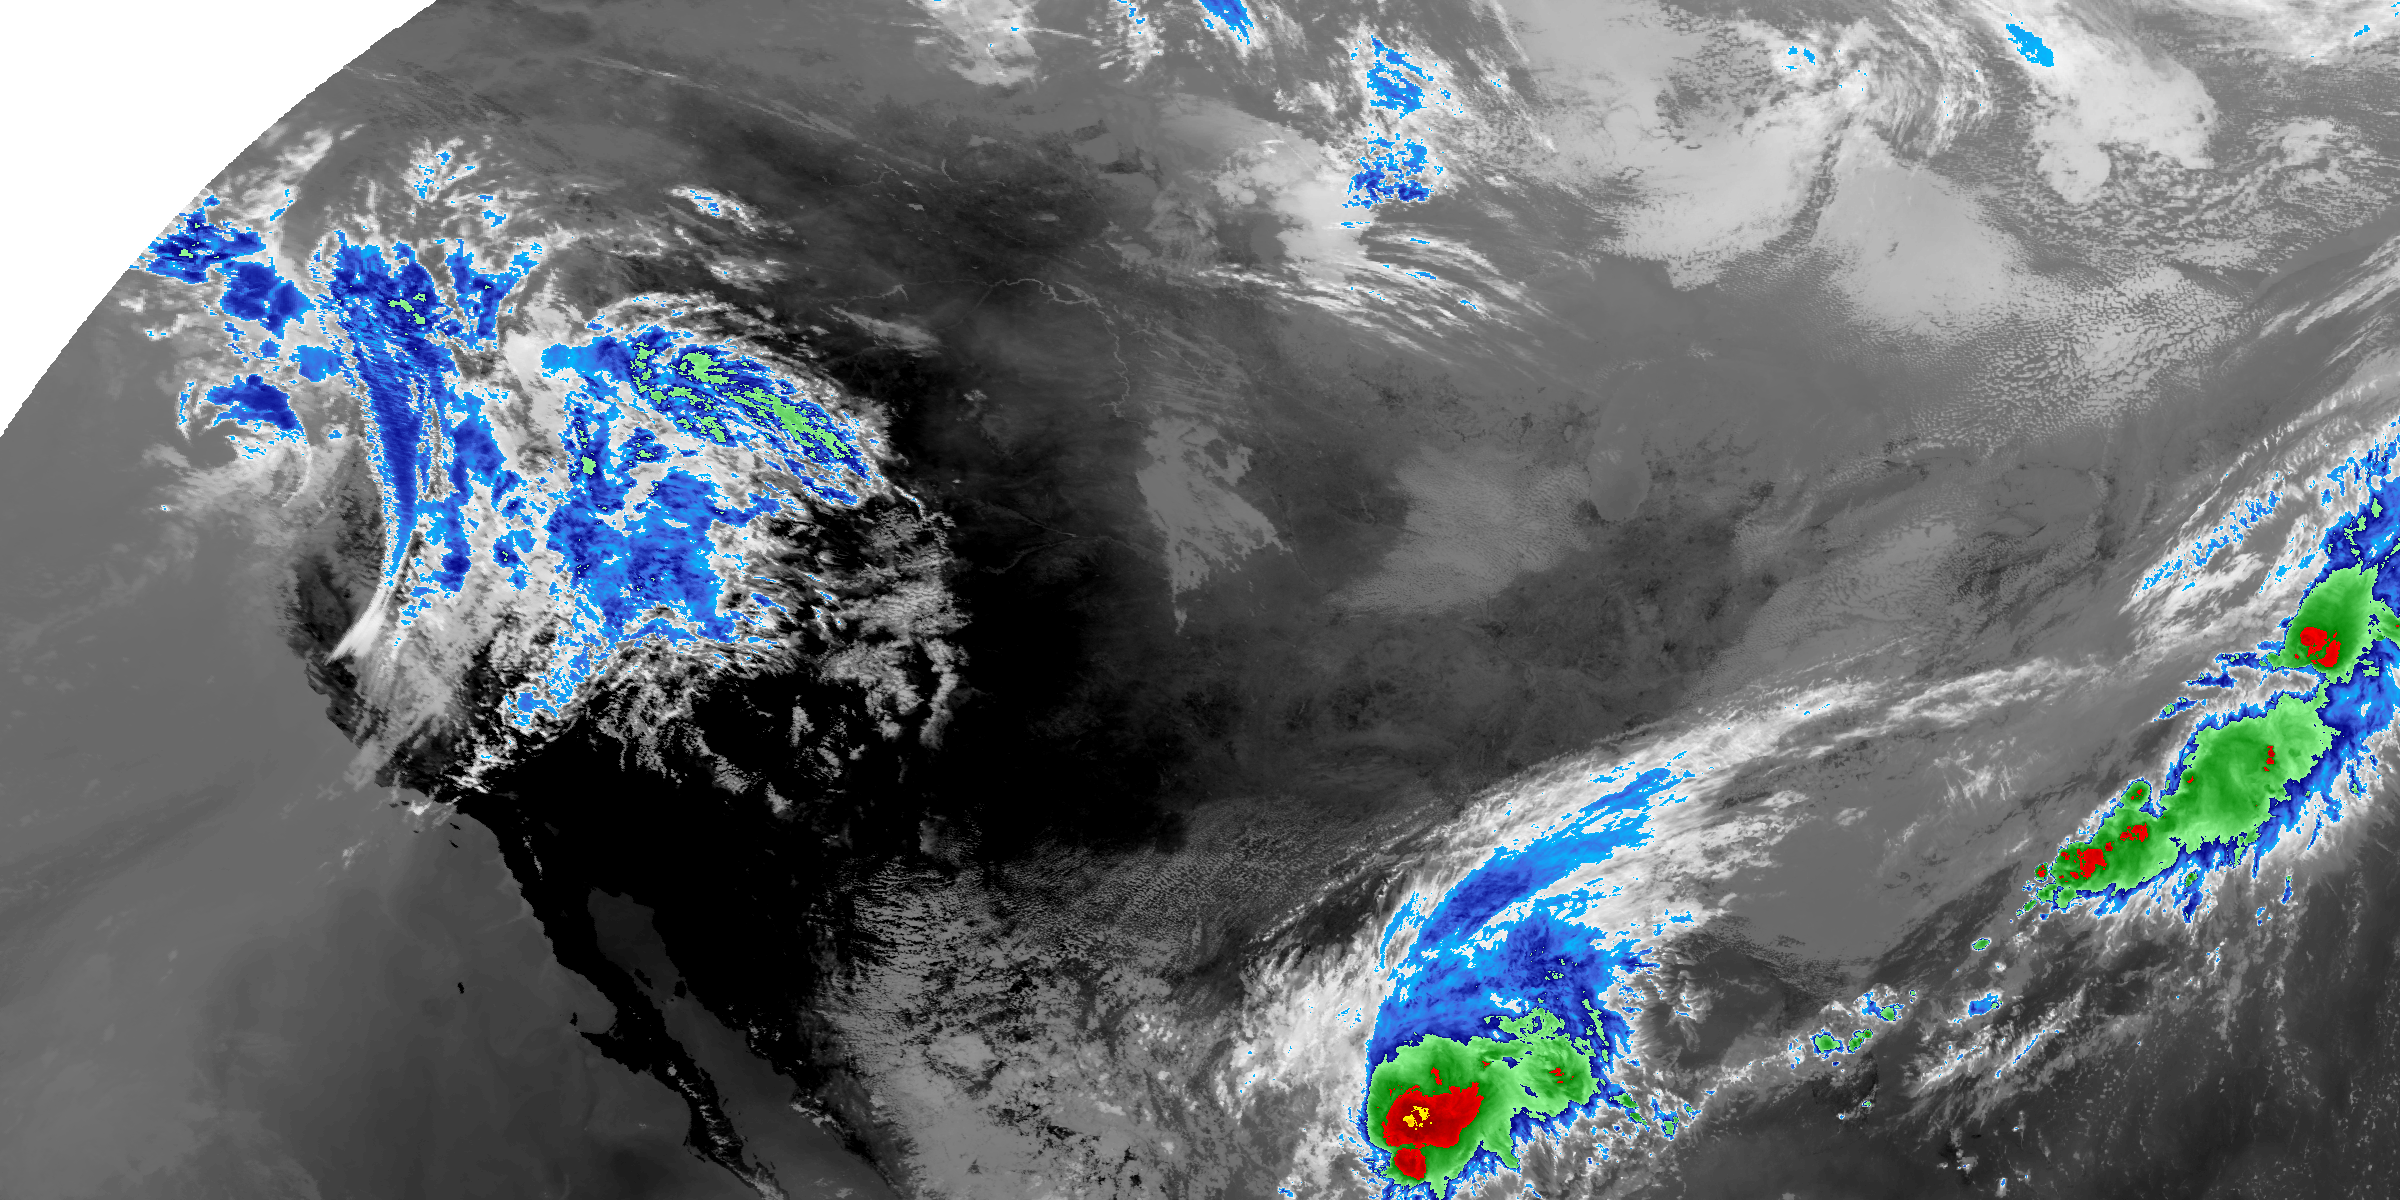

In [17]:
from IPython.display import Image

Image(png_clean_output[0])

### Annotated Imagery Output Formatter
Let's start by loading the imagery_annotated plugin

In [18]:
img_ann_output_formatter = interfaces.output_formatters.get_plugin("imagery_annotated")

img_ann_output_formatter?

Signature:     
img_ann_output_formatter(
    area_def,
    xarray_obj,
    product_name,
    output_fnames,
    clean_fname=None,
    product_name_title=None,
    mpl_colors_info=None,
    feature_annotator=None,
    gridline_annotator=None,
    product_datatype_title=None,
    bg_data=None,
    bg_mpl_colors_info=None,
    bg_xarray=None,
    bg_product_name_title=None,
    bg_datatype_title=None,
    remove_duplicate_minrange=None,
    title_copyright=None,
    title_formatter=None,
    output_dict=None,
    var_name=None,
)
Type:           OutputFormattersPlugin
String form:    <geoips.interfaces.base.OutputFormattersPlugin object at 0x7f1ba0568f50>
File:           ~/miniconda3/lib/python3.11/site-packages/geoips/interfaces/base.py
Docstring:      Matplot-lib based annotated image output.
Call docstring: Plot annotated imagery.

We need to tell matplotlib how we want the resulting plot to appear  
using a feature_annotator and a gridline_annotator.  
This time we will use the default versions of these plugins.

In [19]:
local_feature_annotator = interfaces.feature_annotators.get_plugin("default")

local_gridline_annotator = interfaces.gridline_annotators.get_plugin("default")

Now that we have all the setup completed, we can call our output formatter.  

In [21]:
out_fpath = f"{GEOIPS_OUTDIRS}/abi_infrared_annotated_test_{timestamp}.png"

# And then we call the plugin
formatter_result_dict={}
png_annotated_output = img_ann_output_formatter(conus.area_definition,
                                           output_dataset,
                                           "Infrared",
                                           [out_fpath],
                                           mpl_colors_info=ir_color_dict,
                                           feature_annotator=local_feature_annotator,
                                           gridline_annotator=local_gridline_annotator,
                                           output_dict=formatter_result_dict)

# Let's print the path to the image on your disk
print(f"Annotated Imagery output located at:  {png_annotated_output}")

Annotated Imagery output located at:  ['/home/user01/geoips_outdirs/abi_infrared_annotated_test_20250801133346.png']


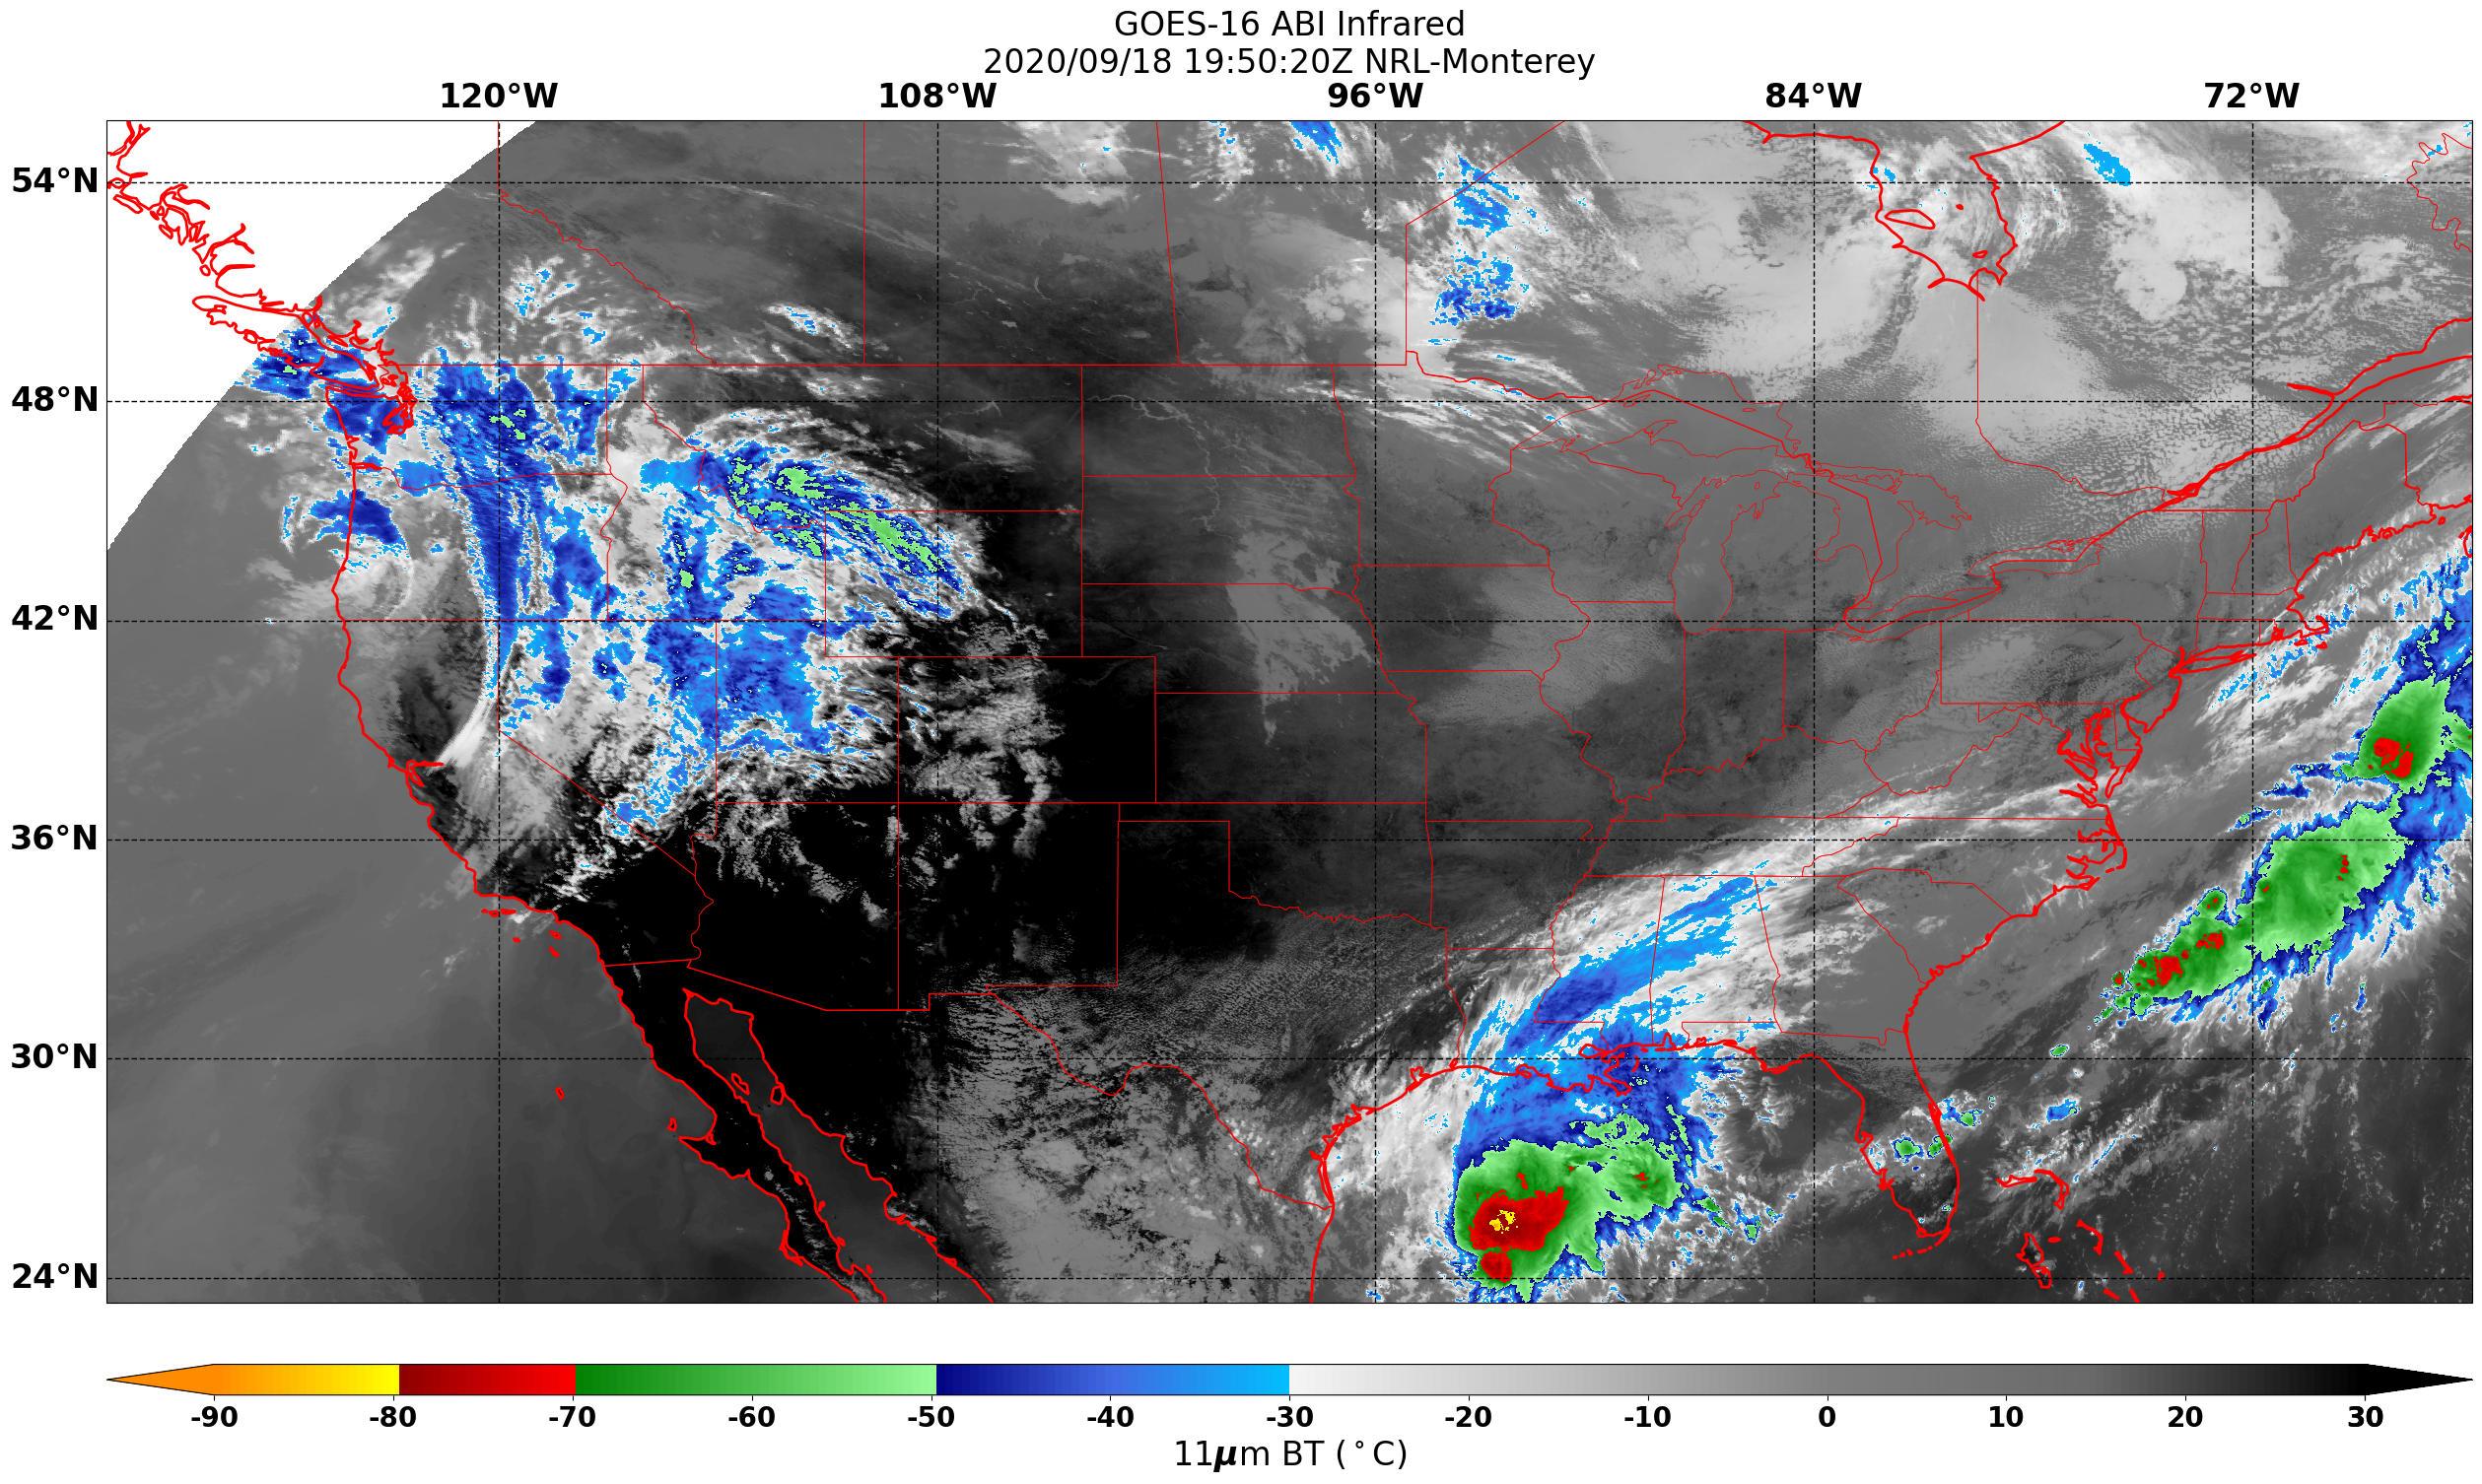

In [22]:
Image(png_annotated_output[0])

# Creating Your Own Output Formatter

First we need to re-do some of the setup work we completed yesterday in the beginner tutorial.

In [23]:
%%bash

cd $GEOIPS_PACKAGES_DIR

if [[ ! -d "template_basic_plugin" && ! -d "$MY_PKG_NAME" ]]; then
    echo "Cloning template_basic_plugin package"
    git clone --no-tags --single-branch $GEOIPS_REPO_URL/template_basic_plugin.git
else
    echo "Package already exists"
fi

# Rename your package
if [[ ! -d "$MY_PKG_NAME" ]]; then
    echo "Renaming template_basic_plugin to $MY_PKG_NAME"
    mv -v template_basic_plugin/ $MY_PKG_NAME
else
    echo "Package already renamed"
fi

# This will remove references to our upstream repository for safety's sake
cd $MY_PKG_DIR
git remote remove origin 2> /dev/null || true

Cloning template_basic_plugin package


Cloning into 'template_basic_plugin'...


Renaming template_basic_plugin to cool_plugins
renamed 'template_basic_plugin/' -> 'cool_plugins'


In [24]:
%%bash
cd $MY_PKG_DIR

# Rename the package directory
if [[ -d "my_package" ]]; then
    echo "Moving my_package to $MY_PKG_NAME"
    git mv my_package $MY_PKG_NAME
else
    echo "Already moved"
fi

Moving my_package to cool_plugins


In [25]:
"""Overwrite cool_plugins' pyproject.toml and README.md with correct contents."""

import os

with open("./updated_files/pyproject.toml", "r") as rf:
    toml_lines = rf.readlines()

with open(f"{os.environ['MY_PKG_DIR']}/pyproject.toml", "w") as wf:
    wf.writelines(toml_lines)

with open("./updated_files/README.md", "r") as rf:
    md_lines = rf.readlines()

with open(f"{os.environ['MY_PKG_DIR']}/README.md", "w") as wf:
    wf.writelines(md_lines)

In [35]:
%%bash

pip install -e $MY_PKG_DIR

Obtaining file:///home/user01/cool_plugins
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for cool_plugins (pyproject.toml): started
  Building editable for cool_plugins (pyproject.toml): finished with status 'done'
  Created wheel for cool_plugins: filename=cool_plugins-0.0.0.post40.dev0-py3-none-any.whl size=5890 sha256=4cd6d7ebdf900c0c52af906f2fa32cb1bd1d30a644a2014f15eabd4c1a1c262e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ubh2fi6h/wheels/9d/b0/d5/a858be68a044ea37161e4b22536d9d7ab3cb6a62247b90f8f1
Successfully bui

In [41]:
%%bash

geoips list output-formatters -p cool_plugins


-----------------
output_formatters
-----------------
╭──────────────────┬──────────────────┬──────────────────┬─────────────┬───────────────┬────────────────┬─────────────────╮
│ GeoIPS Package   │ Interface Name   │ Interface Type   │ Family      │ Plugin Name   │ Source Names   │ Relative Path   │
├──────────────────┼──────────────────┼──────────────────┼─────────────┼───────────────┼────────────────┼─────────────────┤
│ cool_plugin      │ output_form      │ module_base      │ xarray_data │ my_netcdf_o   │ N/A            │ plugins/mod     │
│ s                │ atters           │ d                │             │ utput         │                │ ules/output     │
│                  │                  │                  │             │               │                │ _formatters     │
│                  │                  │                  │             │               │                │ /my_netcdf_     │
│                  │                  │                  │             │      

^^^^^^^^^^^^^^^^^^^  
After running the previous cells, you should see `cool_plugins` in the output directly above this cell!

Otherwise, please ask for help so that we can get you situated!

We will start out by creating a blank output formatter in the cool_plugins package:

In [28]:
%%bash

mkdir -p $MY_PKG_DIR/$MY_PKG_NAME/plugins/modules/output_formatters

touch $MY_PKG_DIR/$MY_PKG_NAME/plugins/modules/output_formatters/my_netcdf_output.py
touch $MY_PKG_DIR/$MY_PKG_NAME/plugins/modules/output_formatters/__init__.py

Now you should have a blank Python file ready for you to write your great ideas into.  
Open [my_netcdf_output.py](../../cool_plugins/cool_plugins/plugins/modules/output_formatters/my_netcdf_output.py) and now we should give ourselves something to work with...  

By copying the great work that has already been done by others!  

Imagine what sort of output you want to create...  
Do you want to save this data as a bar plot? A blob inside a relational database? Bytes stored as plaintext?  
Or maybe as a beautiful glossy png that you can print out and hang on your wall?  

Let's pretend you all have the same idea, to create a netcdf file with details about the hit 2001 movie, Spy Kids!

Paste the following lines of code into my_netcdf_output.py:  

```
"""My NetCDF output format."""  
import logging  
import xarray    
from geoips.geoips_utils import copy_standard_metadata 
from geoips.plugins.modules.output_formatters.netcdf_xarray import write_xarray_netcdf

LOG = logging.getLogger(__name__)  

interface = "output_formatters"  
family = "xarray_data"  
name = "my_netcdf_output"  
  
def call(xarray_obj, product_names, output_fnames):  
    """Write GeoIPS style NetCDF to disk."""  
    prod_xarray = xarray.Dataset()  
  
    copy_standard_metadata(xarray_obj, prod_xarray)  
    for product_name in product_names:  
        prod_xarray[product_name] = xarray_obj[product_name]  
  
    prod_xarray = prod_xarray.assign_attrs(Starring="Danny Trejo",  
                                           Featuring="Antonio Banderas",  
                                           ProducedBy="Elizabeth Avellán")  
  
    for ncdf_fname in output_fnames:  
        write_xarray_netcdf(prod_xarray, ncdf_fname)  
    return output_fnames  
```

Notice that this code has the following key features of any GeoIPS plugin:  
- A descriptive top-level docstring which tells users what the plugin does
- Top-level imports of third-party and native Python libraries
- A defined logging method **use it!**
- Interface, Family, and Plugin Name
- A call function with its own descriptive docstring
- The call function returns a list of filenames (required by this type of family)

Now we need to edit the [pyproject.toml](../../cool_plugins/pyproject.toml) so that GeoIPS is aware of the great new output formatter we just created!  

Add the following lines to the bottom of that file:  
```
[project.entry-points."geoips.output_formatters"]
my_netcdf_output = "cool_plugins.plugins.modules.output_formatters.my_netcdf_output"
```

And now we need to reinstall our plugin, since we modified the pyproject.toml file

In [42]:
%%bash

find $HOME -path "*/plugins/*" -type d -name ".ipynb_checkpoints" -exec rm -rf {} +

pip install -e $MY_PKG_DIR
geoips config create-registries

Obtaining file:///home/user01/cool_plugins
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for cool_plugins (pyproject.toml): started
  Building editable for cool_plugins (pyproject.toml): finished with status 'done'
  Created wheel for cool_plugins: filename=cool_plugins-0.0.0.post40.dev0-py3-none-any.whl size=5890 sha256=4cd6d7ebdf900c0c52af906f2fa32cb1bd1d30a644a2014f15eabd4c1a1c262e
  Stored in directory: /tmp/pip-ephem-wheel-cache-p_k1uchl/wheels/9d/b0/d5/a858be68a044ea37161e4b22536d9d7ab3cb6a62247b90f8f1
Successfully bui

In [49]:
%%bash

geoips run single_source $GEOIPS_TESTDATA_DIR/test_data_abi/data/goes16_20200918_1950/* \
    --product_name Infrared \
    --reader_name abi_netcdf \
    --filename_formatter geoips_netcdf_fname \
    --output_formatter my_netcdf_output \
    --resampled_read \
    --logging_level info \
    --sector_list conus

01_135938    log_setup.py:268     INFO: USER: user01
01_135938    log_setup.py:269     INFO: HOST: ip-172-31-101-217.ec2.internal
01_135938 run_procflow.py:46      INFO: RETRIEVED COMMAND LINE ARGUMENTS
01_135938    log_setup.py:162  INTERACTIVE: 


Starting single_source procflow...


01_135938 run_procflow.py:50      INFO: COMMANDLINE CALL: 
    /home/user01/miniconda3/bin/geoips \
        run \
        single_source \
        /home/user01/geoips_test_data/test_data_abi/data/goes16_20200918_1950/OR_ABI-L1b-RadF-M6C01_G16_s20202621950205_e20202621959513_c20202621959567.nc \
        /home/user01/geoips_test_data/test_data_abi/data/goes16_20200918_1950/OR_ABI-L1b-RadF-M6C02_G16_s20202621950205_e20202621959513_c20202621959546.nc \
        /home/user01/geoips_test_data/test_data_abi/data/goes16_20200918_1950/OR_ABI-L1b-RadF-M6C03_G16_s20202621950205_e20202621959513_c20202621959570.nc \
        /home/user01/geoips_test_data/test_data_abi/data/goes16_20200918_1950/OR_ABI-L1b-RadF-M6C04_G16_

Look throught the log output for these lines. If you see them, you’ve successfully created a new output formatter!  

```
:Starring = "Danny Trejo" ;
:Featuring = "Antonio Banderas" ;
:ProducedBy = "Elizabeth Avellán" ;
```